#Data Exploration

In [4]:
##PYTHON BASICS FOR FINANCE:
##PANDAS
#!pip install pandas_datareader
import pandas_datareader as pdr
import datetime
import pandas as pd
tesla = pdr.get_data_yahoo('TSLA', start=datetime.datetime(2010, 1, 1), end=datetime.datetime(2018,1,1))
#Tesla Data Frame Exploration
tesla.head()
tesla.tail()
tesla.describe()
tesla.index[3]
tesla.columns[2]

'Open'

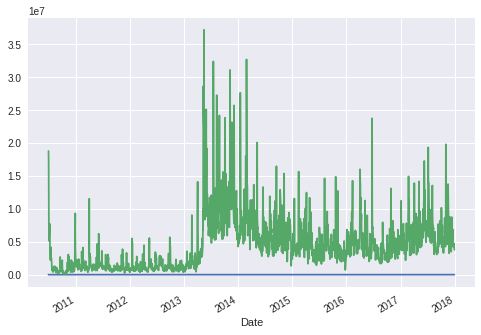

In [5]:
#Visualising time series data
import matplotlib.pyplot as plt
#Plot the closing prices for tesla
tesla['Close'].plot(grid=True)
tesla['Volume'].plot(grid=True)
plt.show()

#Common Financial Analysis

Returns:  


---


"The daily percentage change in the value of a stock over a single day of trading"

In [0]:
import numpy as np

daily_close = tesla[['Adj Close']]
daily_pct_change = daily_close.pct_change()
daily_pct_change.fillna(0, inplace=True)

In [0]:
#Inspect daily returns
print(daily_pct_change)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2e9d78ef0>]],
      dtype=object)

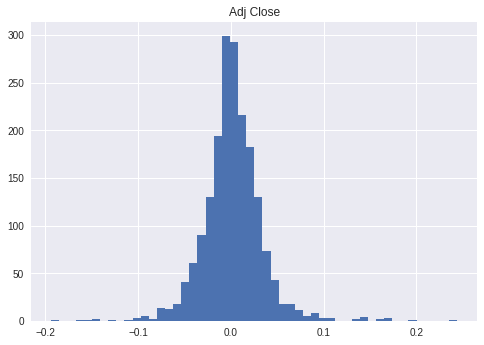

In [8]:
#Plot the daily pct change
daily_pct_change.hist(bins = 50)

In [0]:
# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)
daily_log_returns_shift = np.log(daily_close / daily_close.shift(1))


In [0]:
# Print daily log returns
print(daily_log_returns)

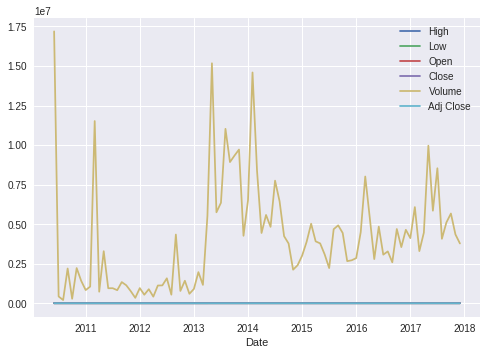

In [10]:
#Returns for monthly/quarterly returns
monthly = tesla.resample('BM').apply(lambda x: x[-1])
monthly.pct_change()
monthly.plot()

Cummulative Daily Rate of Return


---
Used to determine the value of an investement at regular intervals


In [0]:
# Calculate the cumulative daily returns: add 1 and calculate cummulative product
cum_daily_return = (1 + daily_pct_change).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)


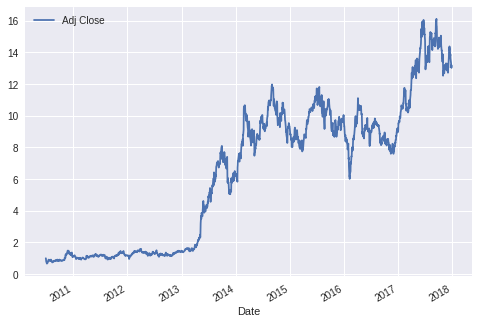

In [12]:
#Plot the graph
cum_daily_return.plot()

In [0]:
#To return the monthly returns, just resample to bring the cummulative daily return to monthly level
# Resample the cumulative daily return to cumulative monthly return
cum_monthly_return = cum_daily_return.resample("M").mean()


In [0]:
# Print the `cum_monthly_return`
print(cum_monthly_return)

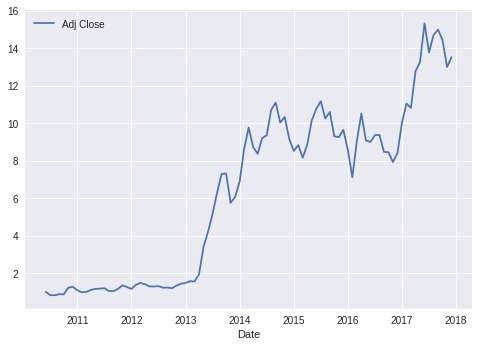

In [14]:
cum_monthly_return.plot()

#Working with Multiple Tickers

In [0]:
#Create a function that allows us to compare multiple stock options
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

In [16]:
#Initialise the data
tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2007,1,1), datetime.datetime(2018,1,1))
all_data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,11076.000000,11076.000000,11076.000000,11076.000000,1.107600e+04,11076.000000
mean,176.232522,173.220667,174.765258,174.768021,4.623859e+07,164.327878
std,199.707781,196.741513,198.296907,198.288176,7.073391e+07,201.457365
min,11.714286,11.171429,11.341429,11.171429,7.900000e+03,7.481090
25%,40.197500,39.499999,39.889998,39.827501,4.620175e+06,31.957970
50%,116.250000,113.750000,115.000000,115.125000,1.709730e+07,95.623455
75%,201.691162,198.737495,199.995003,200.052494,5.782442e+07,168.352158
max,1078.489990,1063.550049,1075.199951,1077.140015,8.432424e+08,1077.140015


In [0]:
# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

In [0]:
# Calculate the daily percentage change for `daily_close_px`
all_daily_pct_change = daily_close_px.pct_change()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2e72b71d0>,
      dtype=object)

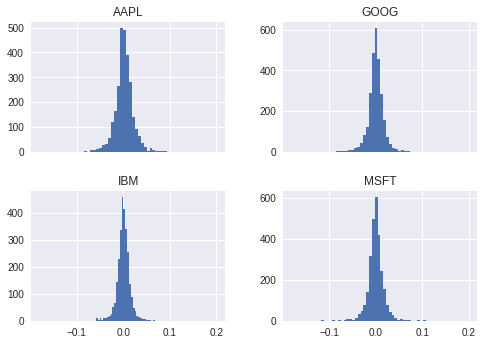

In [19]:
#Plot the distributions
all_daily_pct_change.hist(bins=50, sharex=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2e6fd0f60>,
      dtype=object)

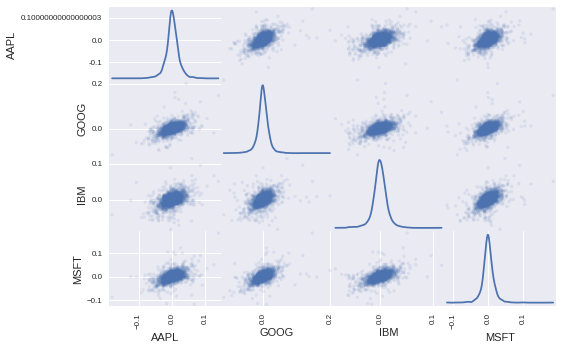

In [20]:
#Scatter Plot
pd.plotting.scatter_matrix(all_daily_pct_change, diagonal ='kde', alpha=0.1)

Moving Windows

Moving windows are there when you compute the statistic on a window of data represented by a particular period of time and then slide the window across the data by a specified interval. That way, the statistic is continually calculated as long as the window falls first within the dates of the time series.

             Adj Close
Date                  
2017-12-15  317.583749
2017-12-18  317.427999
2017-12-19  317.280000
2017-12-20  317.071000
2017-12-21  317.216500
2017-12-22  317.192250
2017-12-26  317.102750
2017-12-27  316.891751
2017-12-28  316.487501
2017-12-29  316.244251


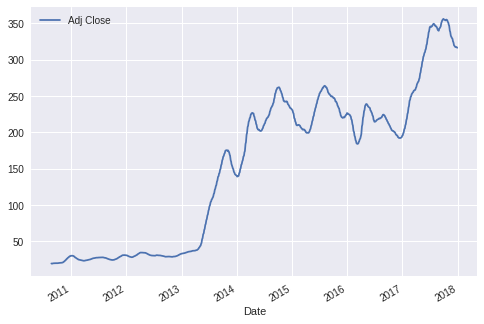

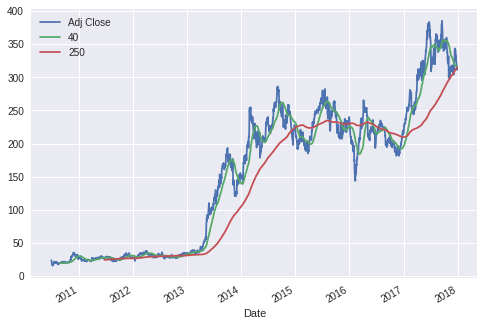

In [21]:
moving_avg = daily_close.rolling(window=40).mean()
print(moving_avg[-10:])
moving_avg.plot()

#short moving window rolling mean
tesla['40'] = daily_close.rolling(window=40).mean()
#Long term moving window
tesla['250'] = daily_close.rolling(window=250).mean()
#Plot the combination of the 3 windows
tesla[['Adj Close', '40','250']].plot()

Volatility Calculation


---
Measurement of change in variance in returns of stock over a specific period of time.


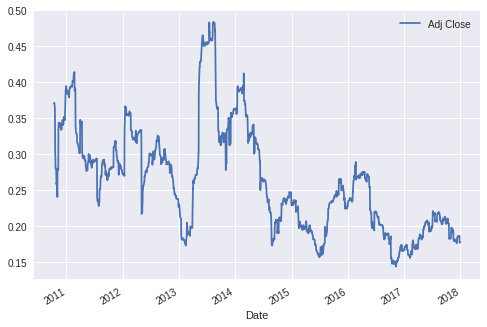

In [22]:
#define the minimum periods to consider
min_periods = 75
#Calculate tesla volatility
tesla_vol = daily_pct_change.rolling(min_periods).std()*np.sqrt(min_periods)
#Plot the volatility graph
tesla_vol.plot()


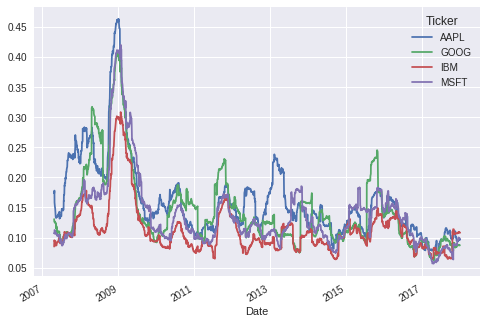

In [23]:
#Plot Volatility for the multiple tickers
all_vol = all_daily_pct_change.rolling(min_periods).std()*np.sqrt(min_periods)
all_vol.plot()

#Ordinary Least Squares Regression

In [24]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
#Isolate adjusted closing price
all_adj_close = all_data[['Adj Close']]

#Calculate the returns
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']

# Add a constant
X = sm.add_constant(return_data['AAPL'])

# Construct the model
model = sm.OLS(return_data['MSFT'],X).fit()


In [26]:
# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     762.6
Date:                Thu, 15 Nov 2018   Prob (F-statistic):          1.81e-148
Time:                        09:34:45   Log-Likelihood:                 7656.2
No. Observations:                2768   AIC:                        -1.531e+04
Df Residuals:                    2766   BIC:                        -1.530e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.052e-05      0.000      0.140      0.8

In [0]:
#Plot the OLSRegression model
plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')

# Add an axis to the plot
ax = plt.axis()

# Initialize `x`
x = np.linspace(ax[0], ax[1] + 0.01)

# Plot the regression line
plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

# Customize the plot
plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')

# Plot the rolling correlation
return_data['MSFT'].rolling(window=252).corr(return_data['AAPL']).plot()

# Building a trading strategy

the Moving Average Crossover

In [0]:
#1. Define lookback periods
short_window = 40
long_window = 100

signals = pd.DataFrame(index=tesla.index)
signals['signal'] = 0.0

In [0]:
#Create short and long SMAs over the lookback periods
#Short
signals['short_mavg'] = tesla['Close'].rolling(window = short_window, min_periods =1, center = False).mean()

#Long
signals['long_mavg'] = tesla['Close'].rolling(window = long_window, min_periods =1, center = False).mean()

In [0]:
#Create Signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0,0.0)

In [0]:
#generate trading orders
signals['positions'] = signals['signal'].diff()

In [0]:
print(signals)

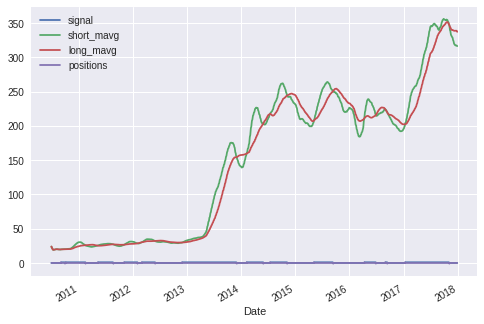

In [34]:
#Plot the signals
signals.plot()

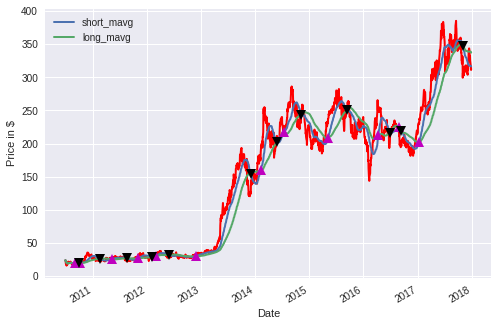

In [36]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
tesla['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index,
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index,
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')

Create a simple back tester

In [0]:
initial_capital = float(100000.0)
positions = pd.DataFrame(index = signals.index).fillna(0.0)
#Buy 100 shares
positions['TSLA'] = 100*signals['signal']

In [38]:
#create data frame to store market value of an open position
portfolio = positions.multiply(tesla['Adj Close'], axis=0)

#Store the difference in shares owned
pos_diff = positions.diff()

#Add holdings to the portfolio
portfolio['holdings'] = (positions.multiply(tesla['Adj Close'], axis =0)).sum(axis =1)

#Add cash to the portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(tesla['Adj Close'], axis = 0)).sum(axis=1).cumsum()

#total
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Print the first lines of `portfolio`
print(portfolio.head())

            TSLA  holdings      cash     total  returns
Date                                                   
2010-06-29   0.0       0.0  100000.0  100000.0      NaN
2010-06-30   0.0       0.0  100000.0  100000.0      0.0
2010-07-01   0.0       0.0  100000.0  100000.0      0.0
2010-07-02   0.0       0.0  100000.0  100000.0      0.0
2010-07-06   0.0       0.0  100000.0  100000.0      0.0


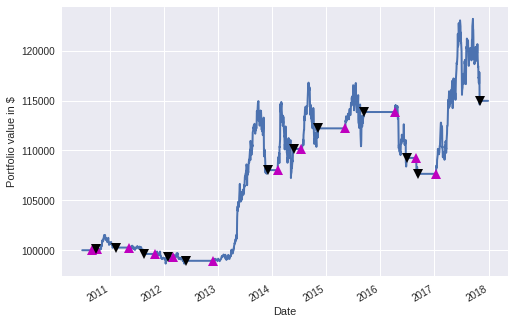

In [39]:
#visualise the portfolio
# Create a figure
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index,
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index,
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

In [40]:
#Evaluate the trading strategy
returns = portfolio['returns']
# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())
print(sharpe_ratio)


0.3628634203613215


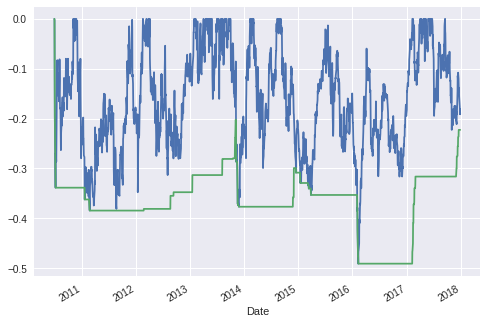

In [41]:
#Calculate Max Drawdown
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = tesla['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = tesla['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

In [42]:
#print Compound Annual Growth Rate(CAGR)
days = (tesla.index[-1] - tesla.index[0]).days

# Calculate the CAGR
cagr = ((((tesla['Adj Close'][-1]) / tesla['Adj Close'][1])) ** (365.0/days)) - 1

# Print the CAGR
print(cagr)

0.4082535782227097
